In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve

from sklearn.model_selection import learning_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.inspection import permutation_importance
from sklearn import metrics

# premiers model de regression lineaire

## dummy model

In [2]:
immo_df = pd.read_csv("immo_1i.csv")
immo_df

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [3]:
y = immo_df["median_house_value"]
X = immo_df.copy()

In [4]:
X= immo_df.drop("median_house_value", axis=1)
X

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,INLAND
...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,<1H OCEAN


In [5]:
X= X.drop("ocean_proximity", axis=1)
X

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815
...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750


In [6]:
# instantiate Dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")

# fit the modem
dummy_clf.fit(X, y)

# calculate the score
dummy_clf.score(X, y)

0.04620881782945736

In [7]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=1)

In [8]:
dummy_clf = DummyClassifier(strategy="most_frequent")

# fit the modem
dummy_clf.fit(X_train, y_train)

# calculate the score
dummy_clf.score(X_test, y_test)

0.04400484457004441

In [9]:
# Splitting the data
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=4)

dummy_clf3 = DummyClassifier(strategy="most_frequent")

# fit the modem
dummy_clf3.fit(X3_train, y3_train)

# calculate the score
dummy_clf3.score(X3_test, y3_test)

0.04804198627371821

In [10]:
# Splitting the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=5)

dummy_clf2 = DummyClassifier(strategy="most_frequent")

# fit the modem
dummy_clf2.fit(X2_train, y2_train)

# calculate the score
dummy_clf2.score(X2_test, y2_test)

0.04481227291077917

## dummy model cross_validate

In [11]:
# Instanciate model
dummy_clf_c = DummyClassifier(strategy="most_frequent")

# 5-Fold Cross validate model
cv_results = cross_validate(dummy_clf_c, X, y, cv=5)

# obtain the mean of scores
cv_results['test_score'].mean()

/home/alicia/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.046208804176149545

Le dummy modele resultat nul 

## LinearRegression


In [12]:
# Splitting the data
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X4_train, y4_train)

# Evaluate the model with the test set
model.score(X4_test, y4_test)


0.6311871393336708

In [13]:
# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)

# obtain the mean of scores
cv_results['test_score'].mean()

0.6348249131619211

In [14]:
y_predicted = model.predict(X4_test)

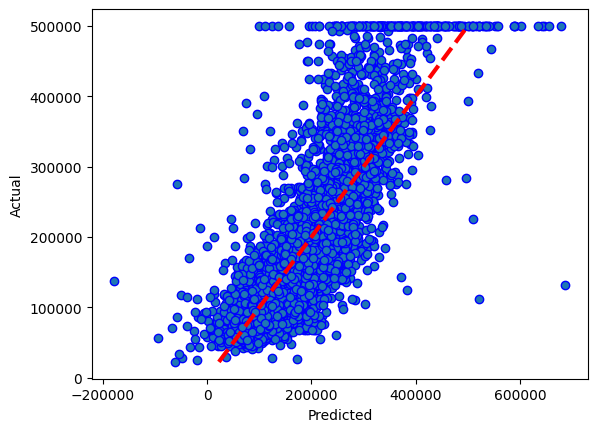

In [15]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y4_test, edgecolors=(0, 0, 1))
ax.plot([y4_test.min(), y4_test.max()], [y4_test.min(), y4_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [16]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y4_test, y_predicted)
mse = metrics.mean_squared_error(y4_test, y_predicted)
r2 = metrics.r2_score(y4_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 50764.920142318566
MSE is 4810010176.483409
R2 score is 0.6311871393336708


MAE, MSE doit etre faible, r2 doit etre proche de 1

# second model de regression lineaire

In [7]:
immo_df2 = pd.read_csv("immo_2i.csv")
immo_df2

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,localisation
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,4
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,3
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,4
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,3
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,4
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND,4
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY,2
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND,4
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN,3


In [8]:
y = immo_df2["median_house_value"]
X = immo_df2.copy()

In [9]:
X= X.drop("median_house_value", axis=1)
X

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,localisation
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,INLAND,4
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,<1H OCEAN,3
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,INLAND,4
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,<1H OCEAN,3
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,INLAND,4
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,INLAND,4
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,NEAR BAY,2
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,INLAND,4
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,<1H OCEAN,3


In [10]:
X= X.drop("ocean_proximity", axis=1)
X

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,localisation
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,4
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,3
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,4
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,3
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,4
...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,4
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,2
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,4
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,3


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6339393851301343

In [12]:
cv_results = cross_validate(model, X, y, cv=5)

cv_results['test_score'].mean()

0.6378776532963158

In [13]:
y_predicted = model.predict(X_test)

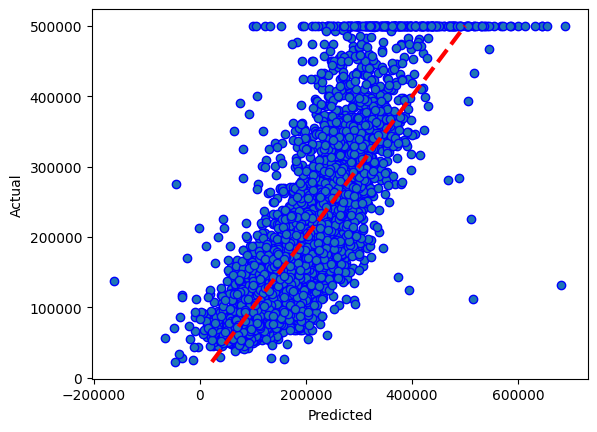

In [14]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [15]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 50327.916837201214
MSE is 4774115738.677593
R2 score is 0.6339393851301343


# troisieme model de regression lineaire

In [2]:
immo_df3 = pd.read_csv("immo_df2.csv")
immo_df3

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,localisation
0,2072.0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,4.0
1,10600.0,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,3.0
2,2494.0,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,4.0
3,4284.0,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,3.0
4,16541.0,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099.0,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,4.0
16508,18898.0,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,2.0
16509,11798.0,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,4.0
16510,6637.0,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,3.0


In [3]:
y = immo_df3["median_house_value"]
X = immo_df3.copy()

In [4]:
X= immo_df3.drop("median_house_value", axis=1)
X

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,localisation
0,2072.0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,4.0
1,10600.0,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,3.0
2,2494.0,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,4.0
3,4284.0,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,3.0
4,16541.0,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,4.0
...,...,...,...,...,...,...,...,...,...,...
16507,1099.0,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,4.0
16508,18898.0,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,2.0
16509,11798.0,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,4.0
16510,6637.0,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,3.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6352794093558214

In [6]:
cv_results = cross_validate(model, X, y, cv=5)

cv_results['test_score'].mean()

0.64030905625118

In [7]:
y_predicted = model.predict(X_test)

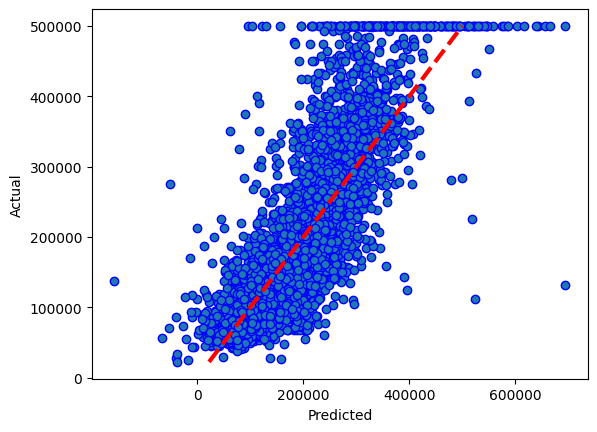

In [8]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [9]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 50096.55762382661
MSE is 4756639314.046834
R2 score is 0.6352794093558214


# quatrieme model de regression lineaire

In [2]:
immo_df4 = pd.read_csv("immo_df3.csv")
immo_df4

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,localisation
0,2072.0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,4.0
1,10600.0,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,3.0
2,2494.0,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,4.0
3,4284.0,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,3.0
4,16541.0,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099.0,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,4.0
16508,18898.0,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,2.0
16509,11798.0,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,4.0
16510,6637.0,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,3.0


In [3]:
y = immo_df4["median_house_value"]
X = immo_df4.copy()

In [4]:
X= immo_df4.drop("median_house_value", axis=1)
X

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,localisation
0,2072.0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,4.0
1,10600.0,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,3.0
2,2494.0,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,4.0
3,4284.0,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,3.0
4,16541.0,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,4.0
...,...,...,...,...,...,...,...,...,...,...
16507,1099.0,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,4.0
16508,18898.0,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,2.0
16509,11798.0,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,4.0
16510,6637.0,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,3.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6352794093558214

In [6]:
cv_results = cross_validate(model, X, y, cv=5)

cv_results['test_score'].mean()

0.64030905625118

In [7]:
y_predicted = model.predict(X_test)

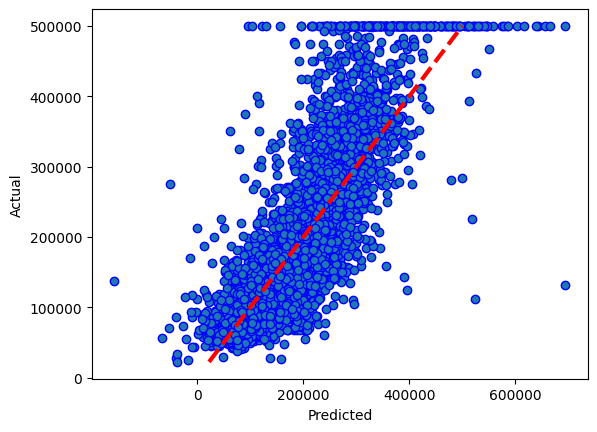

In [8]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [9]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 50096.55762382661
MSE is 4756639314.046834
R2 score is 0.6352794093558214
